In [1]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode
from langchain_community.utilities import SQLDatabase

d:\Study\LLM\AgenticAI\SQL_Database_Agent_LangGraph\venv\Lib\site-packages\IPython\core\interactiveshell.py:3549: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
import os
import sqlite3

In [3]:
# Step 1: Delete existing database file (if it exists)
if os.path.exists("mydb.db"):
    os.remove("mydb.db")
    print("Old database deleted. Fresh start!")

Old database deleted. Fresh start!


In [4]:

connection = sqlite3.connect("mydb.db")

In [5]:

connection

In [6]:
table_creation_query="""
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [7]:
table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [8]:
table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [9]:
cursor=connection.cursor() #To execute commands in DB

In [10]:
cursor.execute("DROP TABLE IF EXISTS orders")
cursor.execute("DROP TABLE IF EXISTS customers")
cursor.execute("DROP TABLE IF EXISTS employees")


In [11]:

cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [12]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [13]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [14]:

cursor.executemany(insert_query,employee_data)
cursor.executemany(insert_query_customers,customers_data)
cursor.executemany(insert_query_orders,orders_data)

In [15]:

connection.commit()

In [16]:
cursor.execute("select * from orders;")

In [17]:
for row in cursor.fetchall():
    print(row)

(1, 1, '2023-12-01', 250.75)
(2, 2, '2023-11-20', 150.5)
(3, 3, '2023-11-25', 300.0)
(4, 4, '2023-12-02', 450.0)


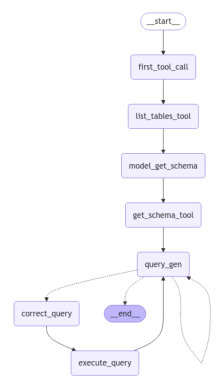

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('image.png')  # Replace with your actual image filename or path
plt.imshow(img)
plt.axis('off')  # Optional: hides the axes
plt.show()


In [19]:
from langchain_community.utilities import SQLDatabase

In [20]:

db=SQLDatabase.from_uri("sqlite:///mydb.db")

In [21]:
db

In [22]:
db.dialect

'sqlite'

In [23]:
db.get_usable_table_names()

['customers', 'employees', 'orders']

In [24]:

from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192")

In [25]:

from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192")

llm.invoke("hello how are you?")

AIMessage(content="Hello! I'm just an AI, I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 15, 'total_tokens': 61, 'completion_time': 0.131428571, 'prompt_time': 0.000168478, 'queue_time': 0.093980816, 'total_time': 0.131597049}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run-d08e12b5-9a65-4396-b3b0-f227df3d3e4c-0', usage_metadata={'input_tokens': 15, 'output_tokens': 46, 'total_tokens': 61})

In [26]:
# Langchain Wrapper
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [27]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)
tools=toolkit.get_tools()
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002303F0ED940>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002303F0ED940>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002303F0ED940>),
 QuerySQLCheckerTool(description='Use this tool to 

In [28]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [29]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

In [30]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)


In [31]:

llm_to_get_schema=llm.bind_tools([get_schema_tool])

In [32]:
# Custom Tool Crated

from langchain_core.tools import tool
@tool
def query_to_database(query:str)->str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result=db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [33]:
query_to_database.invoke("SELECT * FROM Employees;")

"[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]"

In [34]:
llm_with_tools=llm.bind_tools([query_to_database])

In [35]:
llm_with_tools.invoke("SELECT * FROM Employees;")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8hkt', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 947, 'total_tokens': 995, 'completion_time': 0.137142857, 'prompt_time': 0.030890161, 'queue_time': 0.09417547400000001, 'total_time': 0.168033018}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-9894ec00-e173-4092-8eae-9f52c18c4445-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'call_8hkt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 48, 'total_tokens': 995})

In [36]:
llm_with_tools.invoke("Show me all orders placed in December")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4qs4', 'function': {'arguments': '{"query":"SELECT * FROM orders WHERE month(placed) = 12"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 949, 'total_tokens': 1004, 'completion_time': 0.165706252, 'prompt_time': 0.038606312, 'queue_time': 0.09720489899999998, 'total_time': 0.204312564}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e70d7584-dbae-4c6e-95a3-61c0de3dab5b-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM orders WHERE month(placed) = 12'}, 'id': 'call_4qs4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 949, 'output_tokens': 55, 'total_tokens': 1004})

In [37]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [38]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [39]:
list_tables=create_node_from_tool_with_fallback([list_tables_tool])
get_schema=create_node_from_tool_with_fallback([get_schema_tool])
query_database=create_node_from_tool_with_fallback([query_to_database])


In [40]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

check_generated_query = query_check_prompt | llm_with_tools

In [41]:
check_generated_query.invoke({"messages": [("user", "SELECT * FROM Employees LIMIT 5;")]})


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8315', 'function': {'arguments': '{"query":"SELECT * FROM Employees LIMIT 5;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 1051, 'total_tokens': 1102, 'completion_time': 0.145714286, 'prompt_time': 0.042105833, 'queue_time': 0.094516302, 'total_time': 0.187820119}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7acb039e-be58-4523-8ec5-4d4437ee024e-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees LIMIT 5;'}, 'id': 'call_8315', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1051, 'output_tokens': 51, 'total_tokens': 1102})

In [42]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")
    
llm_with_final_answer=llm.bind_tools([SubmitFinalAnswer])

In [43]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system_prompt = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer. """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm_with_final_answer


In [44]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    print(f"state from first_tool_call: {state}")
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}


In [45]:
def check_the_given_query(state:State):
    print(f"state from check the given query: {state}")
    return {"messages": [check_generated_query.invoke({"messages": [state["messages"][-1]]})]}


In [46]:
def generation_query(state:State):
    message = query_generator.invoke(state)
    print(f"state from generation_query: {state}")

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [47]:
def should_continue(state:State):
    print(f"state from should_continue: {state}")
    messages = state["messages"]
    last_message = messages[-1]
    print("last message")
    print(last_message)
    if getattr(last_message, "tool_calls", None):
        print("sooo")
        return END
    elif last_message.content.startswith("Error:"):
        print("dooo")
        return "query_gen"
    else:
        print("oooo")
        return "correct_query"

In [48]:
def llm_get_schema(state:State):
    print("state from llm_get_schema", state)
    response = llm_to_get_schema.invoke(state["messages"])
    return {"messages": [response]}

In [49]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", list_tables)
workflow.add_node("get_schema_tool", get_schema)
workflow.add_node("model_get_schema", llm_get_schema)
workflow.add_node("query_gen", generation_query)
workflow.add_node("correct_query", check_the_given_query)
workflow.add_node("execute_query", query_database)


In [50]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")


In [51]:
app=workflow.compile()

In [53]:
query={"messages": [("user", "how many order are there which is more than 300 rupees?")]}
response=app.invoke(query)
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

state from first_tool_call: {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='89b5eb82-378c-4465-9d0f-60ea4cb0ae55')]}
state from llm_get_schema {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='89b5eb82-378c-4465-9d0f-60ea4cb0ae55'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='0bb15095-57c4-49c4-988a-2d95c1f9cc0e', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='4bddfed2-7390-462d-8e45-6020f0af2749', tool_call_id='tool_abcd123')]}
state from generation_query: {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='89b5eb82-378c-4465-9d0f-60ea4cb0ae55'), AIMessa

'2'